## Inercja

suma kwadratów różnic pomiędzy każdym obiektem ($x_i$) a środkiem klastra ($C_k$):

$$\sum_{i=1}^{n}(x_i - C_k)^2$$

 - niższe wartości wskazują na wyodrębnienie bardziej spójnych grup.

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

In [2]:
n = 100

centra = [(-6,-6), (0,0), (6,6), (9,9)]

X, y = make_blobs(n_samples=n, n_features=2, centers=centra, cluster_std=1, random_state=0)

In [3]:
df = pd.DataFrame(X, columns = ['x1', 'x2'])

In [4]:
df['Grupy'] = y

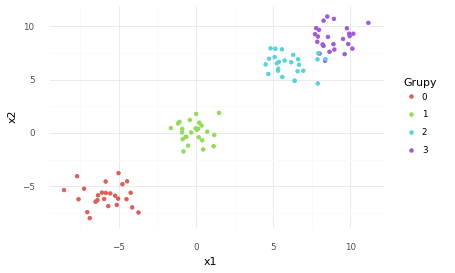

<ggplot: (182387557111)>

In [6]:
(ggplot(df, aes(x= 'x1', y = 'x2', color = 'factor(Grupy)')) + 
 geom_point() + 
 theme_minimal() +
 labs(color = 'Grupy'))

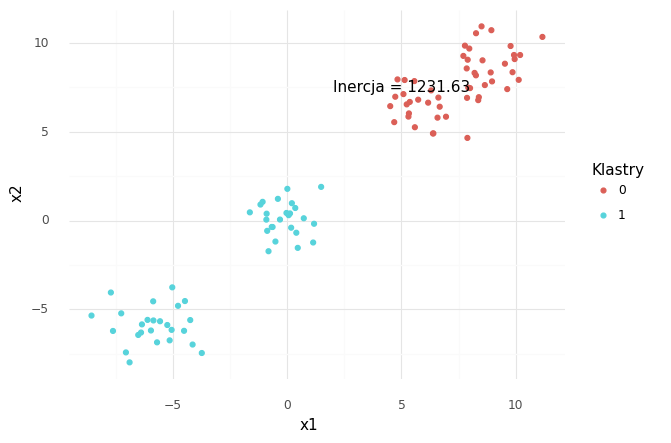

<ggplot: (182390814196)>

In [7]:
# k-means
km_2 = KMeans(n_clusters=2).fit(df[['x1', 'x2']])

# dodanie do ramki kolumny z etykietami klastrów
df['klastry_2'] = km_2.labels_
# df['klastry_2'] = km_2.predict(df[['x1', 'x2']])

# wykres
(ggplot(df, aes(x= 'x1', y = 'x2', color = 'factor(klastry_2)')) + 
 geom_point() + 
 annotate(geom='text', x = 5, y = 7.5, label = f'Inercja = {round(km_2.inertia_, 2)}') +
 theme_minimal() +
 labs(color = 'Klastry'))

## Wykres osypiska

Wizualizacja wartości inercji dla wyników grupowania z przyjętymi podziałami na $k$ klastrów. Szukamy punktu, przy którym następuje spadek przyrostu inercji. Jak podaje Krzyśko i in. (2008, s. 354), wraz ze wzrostem liczby klastrów, suma wariancji wewnątrzgrupowej maleje. Zatem w celu wybrania optymalnej liczby klastrów można posłużyć się zestawieniem na wykresie sum wariancji wewnątrzgrupowych wraz z liczbą klastrów i zastosować heurystyczne podejście zwane metodą łokcia – znaleźć punkt silnego przegięcia, po którym suma wariancji przestaje znacząco spadać. Ten punkt sugeruje, że podział na coraz większą liczbę skupisk w niewielkim stopniu wpływa na podniesienie jakości grupowania (wyodrębnienia spójnych klastrów). 

In [8]:
ks = range(2, 20)
inercje = []

for k in ks:
    km = KMeans(n_clusters=k).fit(df[['x1', 'x2']])
    inercje.append(km.inertia_)

In [9]:
inercje_df = pd.DataFrame({'K': ks,
                           'Inercja': inercje})

In [10]:
inercje_df

,K,Inercja
0,2,1231.629267
1,3,378.810049
2,4,197.299649
3,5,168.968577
4,6,146.063676
5,7,133.826534
6,8,112.133808
7,9,103.769344
8,10,87.700841
9,11,77.700166


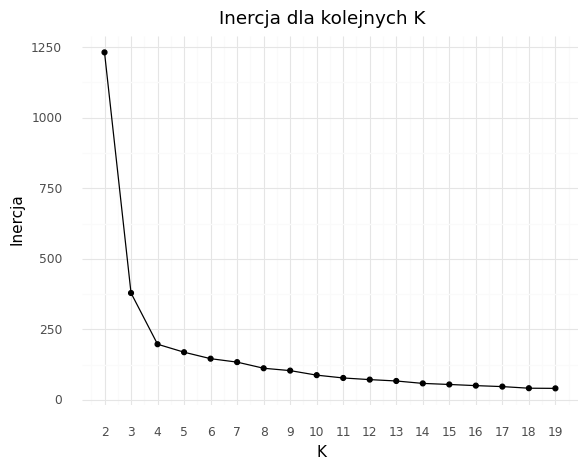

<ggplot: (182390820801)>

In [13]:
(ggplot(inercje_df, aes(x = 'K', y='Inercja'))+
 geom_point() +
 scale_x_continuous(breaks = ks) +
 geom_line() +
 theme_minimal() +
 labs(title= 'Inercja dla kolejnych K'))